In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/student_sleep_patterns.csv')

# Display basic information about the dataset
print("Dataset Information:")
data.info()

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
data.head()

# If sampling is necessary (for large datasets), take a random 10% sample
# Uncomment the line below if sampling is required
# data = data.sample(frac=0.1, random_state=42)

# Check the shape of the sampled data
print("\nSampled Data Shape:", data.shape)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB

First Few 

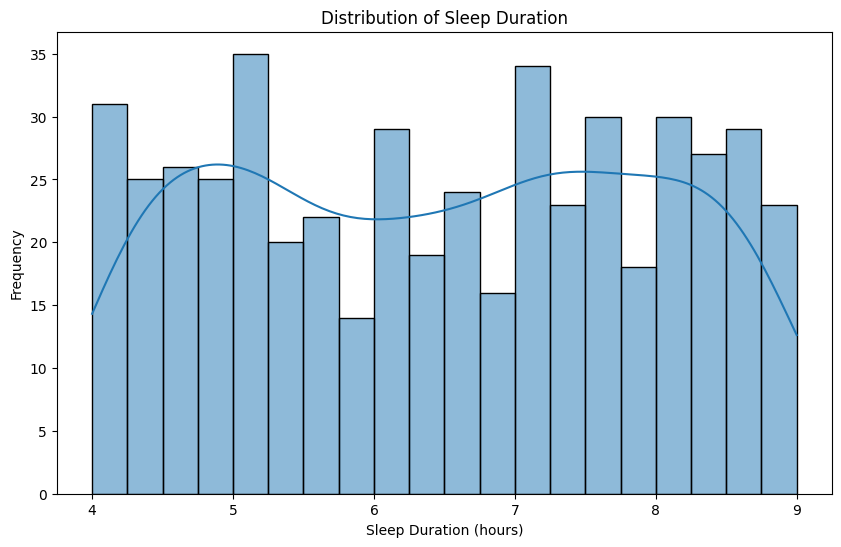

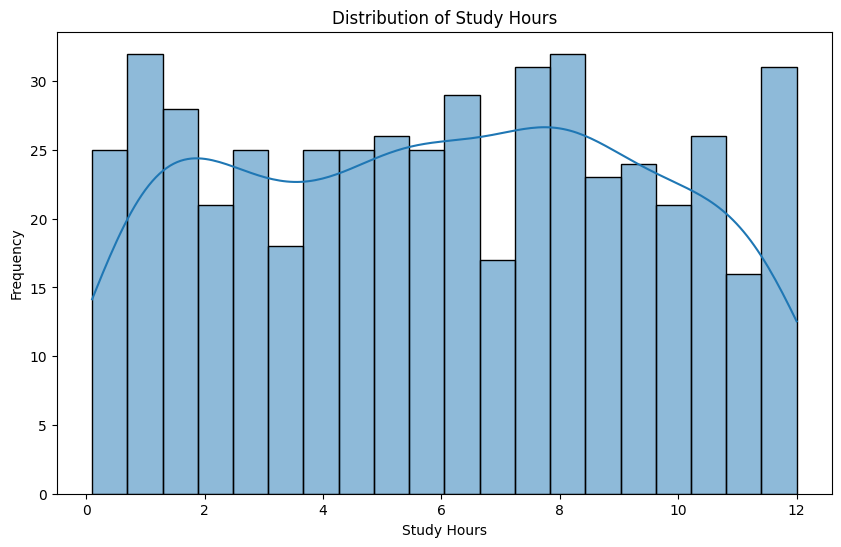

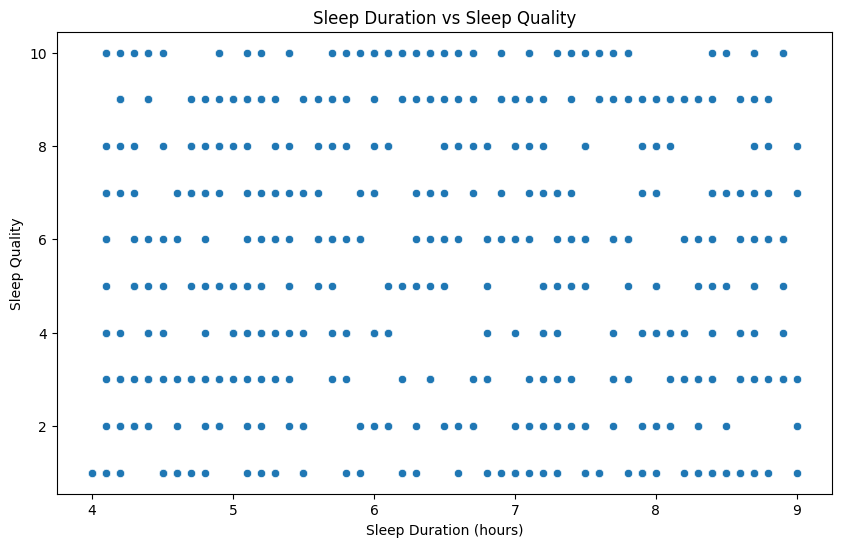

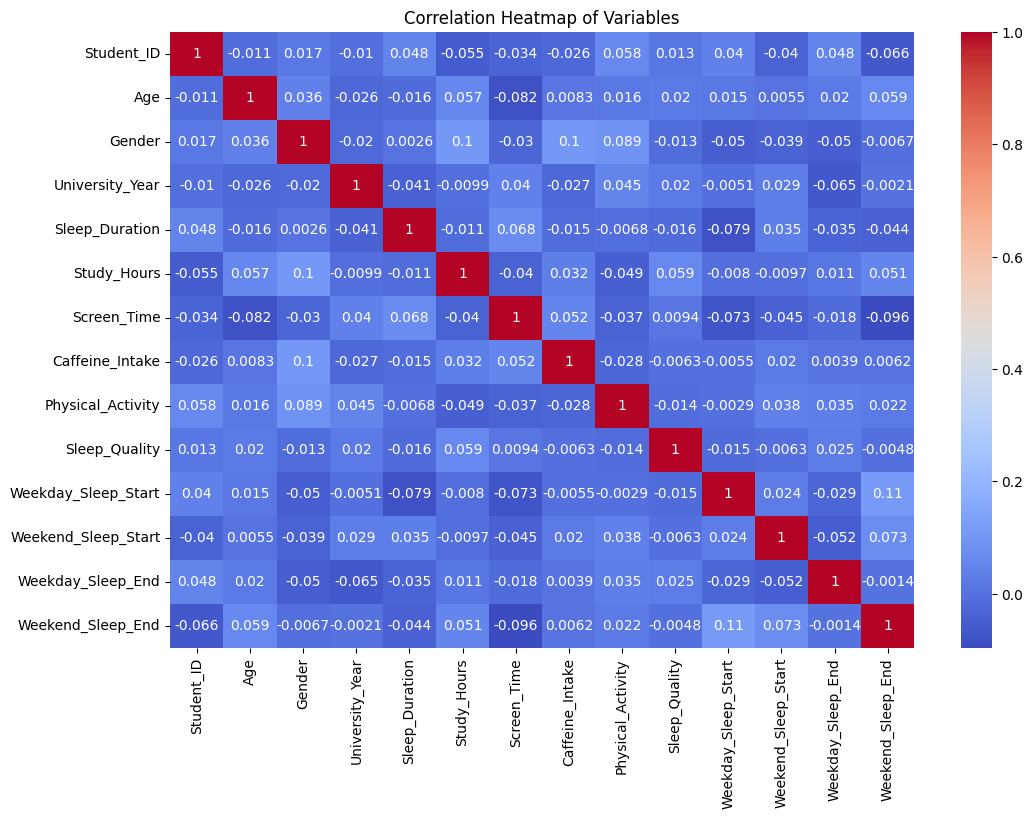

In [4]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sleep duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep_Duration'], bins=20, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Distribution of study hours
plt.figure(figsize=(10, 6))
sns.histplot(data['Study_Hours'], bins=20, kde=True)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

# Relationship between sleep duration and sleep quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Duration', y='Sleep_Quality', data=data)
plt.title('Sleep Duration vs Sleep Quality')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality')
plt.show()

# Convert categorical columns to numeric codes if they are not numeric
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.Categorical(data[column]).codes

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Variables")
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Handle missing values by filling with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Check for missing values after filling
print("\nMissing Values Summary After Filling:")
print(data.isnull().sum())

# Feature Engineering: Extract Sleep Duration Differences for Weekdays vs. Weekends
# Assuming `Weekday_Sleep_Start`, `Weekend_Sleep_Start`, `Weekday_Sleep_End`, and `Weekend_Sleep_End` are available columns
data['Weekday_Sleep_Duration'] = pd.to_datetime(data['Weekday_Sleep_End']) - pd.to_datetime(data['Weekday_Sleep_Start'])
data['Weekend_Sleep_Duration'] = pd.to_datetime(data['Weekend_Sleep_End']) - pd.to_datetime(data['Weekend_Sleep_Start'])
data['Sleep_Duration_Diff'] = (data['Weekend_Sleep_Duration'] - data['Weekday_Sleep_Duration']).dt.total_seconds() / 3600  # Convert to hours

# Drop columns used in feature engineering if necessary
data = data.drop(columns=['Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'])

# Scaling numerical features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display the first few rows of the modified dataset
print("\nModified Data Sample:")
data.head()



Missing Values Summary After Filling:
Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

Modified Data Sample:


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Duration,Weekend_Sleep_Duration,Sleep_Duration_Diff
0,-1.728590,1.057140,2,1,0.827069,0.552495,1.019155,-0.274895,-0.720835,1.564630,-1 days +23:59:59.999999993,0 days 00:00:00.000000003,1.096004
1,-1.721662,-0.229962,1,0,-0.116151,0.005299,-0.727968,1.510138,0.331603,-1.134171,0 days 00:00:00,0 days 00:00:00.000000003,0.257164
2,-1.714734,0.199072,1,3,-0.924625,0.206898,1.601530,1.510138,-0.265726,-0.122121,-1 days +23:59:59.999999986,-1 days +23:59:59.999999990,0.376999
3,-1.707806,1.057140,2,3,-0.116151,0.754094,0.320306,0.915127,-0.208838,1.227279,-1 days +23:59:59.999999987,0 days 00:00:00.000000005,2.054678
4,-1.700877,-0.658997,1,3,-1.194117,-0.945094,0.203831,-1.464917,0.644490,-0.796821,-1 days +23:59:59.999999988,0 days 00:00:00.000000003,1.695175


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert Weekday and Weekend Sleep Duration columns to hours (float)
data['Weekday_Sleep_Duration'] = data['Weekday_Sleep_Duration'].dt.total_seconds() / 3600  # Convert to hours
data['Weekend_Sleep_Duration'] = data['Weekend_Sleep_Duration'].dt.total_seconds() / 3600  # Convert to hours

# Define target and feature variables
X = data.drop(columns=['Sleep_Quality'])  # Features
y = data['Sleep_Quality']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
print("Linear Regression - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linreg))
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_linreg))
print("Linear Regression - R² Score:", r2_score(y_test, y_pred_linreg))

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest Regressor - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor - R² Score:", r2_score(y_test, y_pred_rf))

# Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("\nSupport Vector Regressor - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("Support Vector Regressor - Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("Support Vector Regressor - R² Score:", r2_score(y_test, y_pred_svr))


Linear Regression - Mean Absolute Error: 0.915045501755587
Linear Regression - Mean Squared Error: 1.1012616689241652
Linear Regression - R² Score: -0.054284419414341256

Random Forest Regressor - Mean Absolute Error: 0.9158603957996115
Random Forest Regressor - Mean Squared Error: 1.1120095893655704
Random Forest Regressor - R² Score: -0.0645738586840725

Support Vector Regressor - Mean Absolute Error: 0.958889189236564
Support Vector Regressor - Mean Squared Error: 1.2123199709420331
Support Vector Regressor - R² Score: -0.16060523377486824



Model Performance Comparison:
                      Model  Mean Absolute Error  Mean Squared Error  R² Score
0         Linear Regression             0.915046            1.101262 -0.054284
1   Random Forest Regressor             0.915860            1.112010 -0.064574
2  Support Vector Regressor             0.958889            1.212320 -0.160605


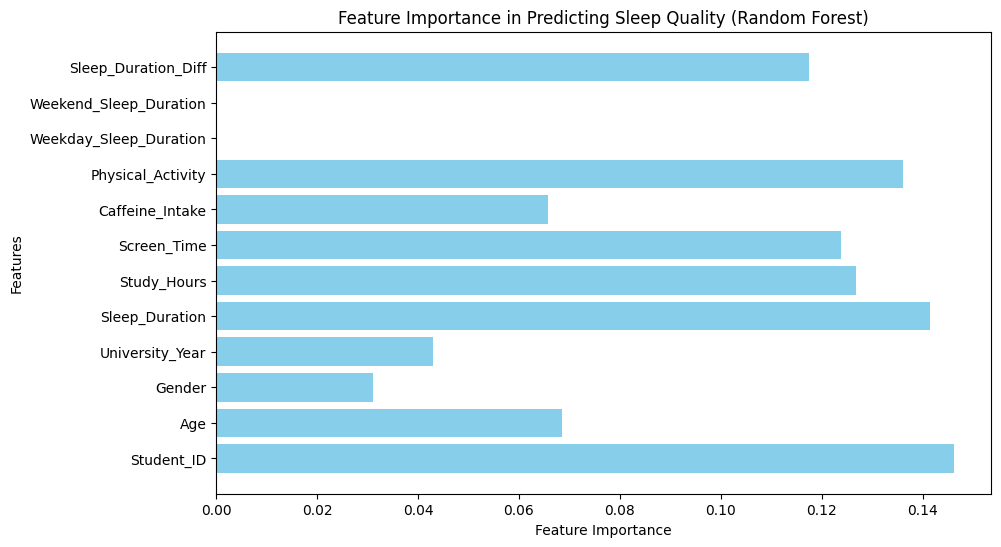

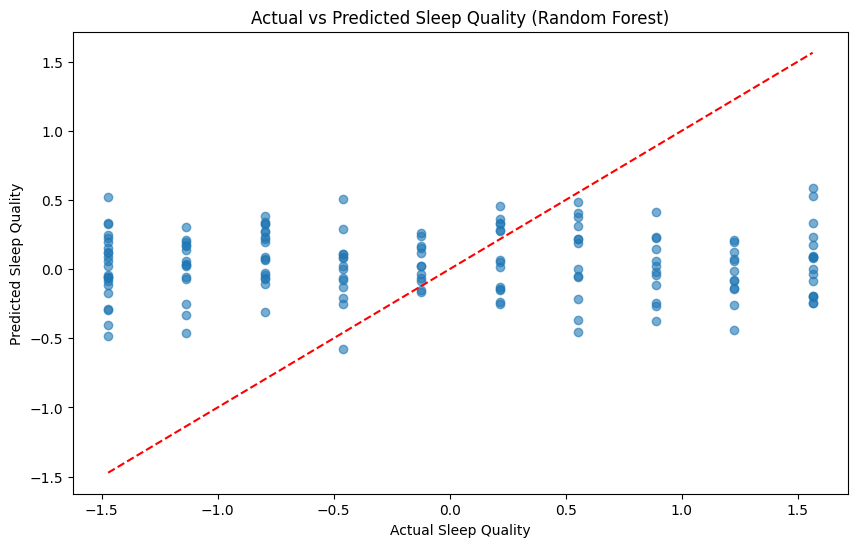

In [8]:
# Summarize model performance for easy comparison
performance_summary = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regressor'],
    'Mean Absolute Error': [
        mean_absolute_error(y_test, y_pred_linreg),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_svr)
    ],
    'Mean Squared Error': [
        mean_squared_error(y_test, y_pred_linreg),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_svr)
    ],
    'R² Score': [
        r2_score(y_test, y_pred_linreg),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_svr)
    ]
}

# Display performance summary
import pandas as pd
performance_df = pd.DataFrame(performance_summary)
print("\nModel Performance Comparison:")
print(performance_df)

import matplotlib.pyplot as plt

# Feature importance for Random Forest
feature_importance = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Sleep Quality (Random Forest)")
plt.show()

# Plot actual vs. predicted values for the best model
y_pred_best = y_pred_rf  # Replace with predictions of the best-performing model if different

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal fit line
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.title("Actual vs Predicted Sleep Quality (Random Forest)")
plt.show()


In [9]:
import joblib

# Save the Random Forest Regressor model
joblib.dump(rf, 'best_sleep_quality_model_random_forest.joblib')

# To load the model in future sessions, use:
# loaded_model = joblib.load('best_sleep_quality_model_random_forest.joblib')


['best_sleep_quality_model_random_forest.joblib']